### **Background**
***(This case study is for Google Data Analysis Professional Certificate)***
Cyclistic is a bike-share company that features more than 5,800 bicycles in 692 stations across Chicago. The director of marketing believes Cyclistic’s future depends on maximising the number of annual memberships. To achieve this vision, the marketing analytics team wants to understand how casual riders and annual members use the programme differently & to design a new marketing programme as a recommendation to convert casual riders into annual members. Thereafter, the Cyclistic executives will determine whether to approve the recommended marketing programme.
**Note:** *I will be using the 6 Phase Analysis methodology learnt from the course, which are Ask – Prepare - Process – Analyse – Share – Act*


### **Phase 1: ASK**
> •	What are the problems you are solving for this analysis?
> •	Who are the key stakeholders requesting for the analsysis?
> •	What are the data sources used for the case study? Is it ROCCC?

Questions to guide the future marketing programme:
1.	How do annual members and casual riders use Cyclistic bikes differently?
2.	Why would casual riders buy Cyclistic annual memberships?
3.	How can Cyclistic use digital media to influence casual riders to become members?

For the purpose of the case study, I will answer Question 1: to find the differences between casual riders and annual members of Cyclistic.

**Business Task & Key Stakeholders**
The aim for the case study is to understand how casual and annual member riders use Cyclistic bike-share programme and to design the future marketing programme based on the analysis. For this case study, our key stakeholders are the director of marketing, the company executive team and Cyclistic’s casual riders.


### **Phase 2: PREPARE**
> •	What are the data sources used for the case study? Is it ROCCC (Reliable, Original, Comprehensive, Current & Cited)?

**Data Sources**
Upon the pre-analysis of the data, the data sets used satisfied the ROCCC (Reliable, Original, Comprehensive, Current, Cited) requirements.
>
**Note:** *The datasets have a different name as Cyclistic is a fictional company and is only used for the purpose of this case study.*

Below are the reasoning 
* **Reliable:** The data are accessible to the public here (https://divvy-tripdata.s3.amazonaws.com/index.html). For this case study, I will focus on data sets from January 2023 until December 2023 which derived from 12 distinct CSV file. Upon the pre-analysis of the data, the data sets used are ROCCC (Reliable, Original, Comprehensive, Current, Cited).
**Note:** *The datasets have a different name as Cyclistic is a fictional company and is only used for the purpose of this case study.*
* **Original:** According to the Divvy Data License Agreement, the data used was originally collected by the City of Chicago (“City”) and the City has given permission to Bikeshare to make certain Divvy system data
* **Comprehensive:** The data set contain all critical information needed to help me understand the difference between casual riders and annual member riders of Cyclistic.
* **Current:** The data source refreshes the data on a monthly schedule and contains the current dataset. For the case study, I am going to use dataset from January 2023 until December 2023.
* **Cited:** The Divvy Data License Agreement contains the information on the owner of the data, the City and the last time refreshed, December 2023.


### **Phase 3: PROCESS**
> What are the steps taken to process the data – ensure that the data is cleaned, no null values before the analysis

For the purpose of the case study, I am using **Excel, R/ RStudio and Tableau** for data cleaning, data analysis and data visualisation

#### Pre-cleaning process
* I saved the datasets in .CSV format with "YYYY-MM" as naming convention system to organise datasets between Jan 2023 - Dec 2023 efficiently.
* Using Excel, I ran through the .CSV file to check what kind of data were collected and to ensure all datasets collected same information. **Result:** There are null values for *start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng*. No null values found in other columns. 
* Since the size of datasets are large, **I have opt to use R/RStudio for data cleaning.**


#### Data Cleaning using R
**Install the necessary packages and import the datasets into RStudio**

In [1]:
library(tidyverse) 
library(janitor)
library(lubridate)
library(geosphere) #This package assists to measure the distance using latitude, longitude data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
#Import datasets using read_csv command
Jan2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202301-divvy-tripdata.csv")
Feb2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202302-divvy-tripdata.csv")
Mar2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202303-divvy-tripdata.csv")
Apr2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202304-divvy-tripdata.csv")
May2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202305-divvy-tripdata.csv")
Jun2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202306-divvy-tripdata.csv")
Jul2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202307-divvy-tripdata.csv")
Aug2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202308-divvy-tripdata.csv")
Sep2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202309-divvy-tripdata.csv")
Oct2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202310-divvy-tripdata.csv")
Nov2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202311-divvy-tripdata.csv")
Dec2023 <- read_csv("/kaggle/input/google-data-analytics-case-study-1-cyclistic/202312-divvy-tripdata.csv")

Rows: 190301 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 190445 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 258678 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

**Check the structure of the datasets**
* **Result:** Data for 'started_at' and 'ended_at' columns in Dec2023 are in chr value. To change these columns to date and time type.
* Then, 12 datasets are merged into one dataset, **merged_cyclistic2023** for data cleaning purposes.

In [3]:
#Check structure of datasets
str(Jan2023)
str(Feb2023)
str(Mar2023)
str(Apr2023)
str(May2023)
str(Jun2023)
str(Jul2023)
str(Aug2023)
str(Sep2023)
str(Oct2023)
str(Nov2023)
str(Dec2023)

spc_tbl_ [190,301 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:190301] "F96D5A74A3E41399" "13CB7EB698CEDB88" "BD88A2E670661CE5" "C90792D034FED968" ...
 $ rideable_type     : chr [1:190301] "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:190301], format: "2023-01-21 20:05:42" "2023-01-10 15:37:36" ...
 $ ended_at          : POSIXct[1:190301], format: "2023-01-21 20:16:33" "2023-01-10 15:46:05" ...
 $ start_station_name: chr [1:190301] "Lincoln Ave & Fullerton Ave" "Kimbark Ave & 53rd St" "Western Ave & Lunt Ave" "Kimbark Ave & 53rd St" ...
 $ start_station_id  : chr [1:190301] "TA1309000058" "TA1309000037" "RP-005" "TA1309000037" ...
 $ end_station_name  : chr [1:190301] "Hampden Ct & Diversey Ave" "Greenwood Ave & 47th St" "Valli Produce - Evanston Plaza" "Greenwood Ave & 47th St" ...
 $ end_station_id    : chr [1:190301] "202480.0" "TA1308000002" "599" "TA1308000002" ...
 $ start_lat         : num [1:190

In [4]:
#Upon checking, data of 'started_at' and 'ended_at' in 'Dec2023' are in chr value. Need to change the structure for these columns
Dec2023$started_at = dmy_hm(Dec2023$started_at)
Dec2023$ended_at = dmy_hm(Dec2023$ended_at)

In [5]:
str(Dec2023)

spc_tbl_ [224,073 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:224073] "C9BD54F578F57246" "CDBD92F067FA620E" "ABC0858E52CBFC84" "F44B6F0E8F76DC90" ...
 $ rideable_type     : chr [1:224073] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:224073], format: "2023-12-02 18:44:00" "2023-12-02 18:48:00" ...
 $ ended_at          : POSIXct[1:224073], format: "2023-12-02 18:47:00" "2023-12-02 18:54:00" ...
 $ start_station_name: chr [1:224073] NA NA NA NA ...
 $ start_station_id  : chr [1:224073] NA NA NA NA ...
 $ end_station_name  : chr [1:224073] NA NA NA NA ...
 $ end_station_id    : chr [1:224073] NA NA NA NA ...
 $ start_lat         : num [1:224073] 41.9 41.9 41.9 42 41.9 ...
 $ start_lng         : num [1:224073] -87.7 -87.7 -87.6 -87.7 -87.6 ...
 $ end_lat           : num [1:224073] 41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num [1:224073] -87.7 -87.6 -87.6 -87.7 -87.6 ...
 $ member_casual     : c

In [6]:
#Merging all datasets into one new dataset
merged_cyclistic2023 <- bind_rows(Jan2023, Feb2023, Mar2023, Apr2023, May2023, Jun2023, Jul2023, Aug2023, Sep2023, Oct2023, Nov2023, Dec2023)

**Check the summary of 'merged_cyclistic2023' dataset**
* There are 5,719,877 observations of data with 13 variables of data
* The data can be group based on the following category: *rideable_type, member_casual, start_station_name, start_station_id, end_station_name, end_station_id*
> * **ride_id:** There are 5,719,877 rows for ride_id, indicating that the ride_id is unique regardless users are casual riders or members. 
> * **rideable_type:** 2,696,011 rows are classic_bike, 78,287 rows are docked_bike and 2,945,579 rows are electric_bike
> * **member_casual:** 2,059,179 rides were made by casual riders, 3,660,698 rides were made by members.
* started_at and ended_at columns are in dttm variables which associated with the ride time in which we can determine the month, days and seasons of the ride time.
* start_lat, start_lng, end_lat, and end_lng columns contain the location data of where the ride started and ended.

In [7]:
#Check the summary for merged dataset, merged_cyclistic2023
summary(merged_cyclistic2023)
colnames(merged_cyclistic2023)
nrow(merged_cyclistic2023)
head(merged_cyclistic2023)
str(merged_cyclistic2023)
glimpse(merged_cyclistic2023)

   ride_id          rideable_type        started_at                 
 Length:5719877     Length:5719877     Min.   :2023-01-01 00:01:58  
 Class :character   Class :character   1st Qu.:2023-05-21 12:50:44  
 Mode  :character   Mode  :character   Median :2023-07-20 18:02:50  
                                       Mean   :2023-07-16 10:27:48  
                                       3rd Qu.:2023-09-16 20:08:49  
                                       Max.   :2023-12-31 23:59:00  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2023-01-01 00:02:41   Length:5719877     Length:5719877    
 1st Qu.:2023-05-21 13:14:09   Class :character   Class :character  
 Median :2023-07-20 18:19:47   Mode  :character   Mode  :character  
 Mean   :2023-07-16 10:45:59                                        
 3rd Qu.:2023-09-16 20:28:10                                        
 Max.   :2024-01-01 23:50:00      

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5719877

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member
13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual
C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member


spc_tbl_ [5,719,877 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5719877] "F96D5A74A3E41399" "13CB7EB698CEDB88" "BD88A2E670661CE5" "C90792D034FED968" ...
 $ rideable_type     : chr [1:5719877] "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5719877], format: "2023-01-21 20:05:42" "2023-01-10 15:37:36" ...
 $ ended_at          : POSIXct[1:5719877], format: "2023-01-21 20:16:33" "2023-01-10 15:46:05" ...
 $ start_station_name: chr [1:5719877] "Lincoln Ave & Fullerton Ave" "Kimbark Ave & 53rd St" "Western Ave & Lunt Ave" "Kimbark Ave & 53rd St" ...
 $ start_station_id  : chr [1:5719877] "TA1309000058" "TA1309000037" "RP-005" "TA1309000037" ...
 $ end_station_name  : chr [1:5719877] "Hampden Ct & Diversey Ave" "Greenwood Ave & 47th St" "Valli Produce - Evanston Plaza" "Greenwood Ave & 47th St" ...
 $ end_station_id    : chr [1:5719877] "202480.0" "TA1308000002" "599" "TA1308000002" ...
 $ start_lat         : 

In [8]:
#Ran a simple analysis to understand the dataframe
n_distinct(merged_cyclistic2023$ride_id)

merged_cyclistic2023 %>%
  group_by(ride_id) %>%
  count(ride_id)  %>%
  filter (n>1)

merged_cyclistic2023 %>%
  group_by(rideable_type) %>%
  count(rideable_type)

merged_cyclistic2023 %>% 
  group_by(member_casual) %>%
  count(member_casual)

[1] 5719877

ride_id,n
<chr>,<int>


rideable_type,n
<chr>,<int>
classic_bike,2696011
docked_bike,78287
electric_bike,2945579


member_casual,n
<chr>,<int>
casual,2059179
member,3660698


**Deal with null values in dataset**
* During pre-analysis, I have identified there are null values for *start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng*. For this step, rechecking using the code below to get the actual number of null values.
* For *start_station_name, start_station_id, end_station_name, end_station_id*, I decided to check what are the top start stations and end stations before deciding to rename null values or to remove.
* For *end_lat* and *end_lng*, I decided to remove these columns as I am unable to determine the distance without these data.


In [9]:
#Check for null values in each column in merged_cyclistic2023
sum(is.na(merged_cyclistic2023$ride_id))
sum(is.na(merged_cyclistic2023$rideable_type))
sum(is.na(merged_cyclistic2023$started_at))
sum(is.na(merged_cyclistic2023$ended_at))
sum(is.na(merged_cyclistic2023$start_station_name))
sum(is.na(merged_cyclistic2023$start_station_id))
sum(is.na(merged_cyclistic2023$end_station_name))
sum(is.na(merged_cyclistic2023$end_station_id))
sum(is.na(merged_cyclistic2023$start_lat))
sum(is.na(merged_cyclistic2023$start_lng))
sum(is.na(merged_cyclistic2023$end_lat))
sum(is.na(merged_cyclistic2023$end_lng))
sum(is.na(merged_cyclistic2023$member_casual))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 875716

[1] 875848

[1] 929202

[1] 929343

[1] 0

[1] 0

[1] 6990

[1] 6990

[1] 0

In [10]:
#Check what are the top stations for start_station_name, start_station_id, end_station_name, end_station_id
merged_cyclistic2023 %>%
  count(start_station_name, start_station_id) %>%
  arrange(desc(n)) %>% 
  slice (1:10)

merged_cyclistic2023 %>%
  count(end_station_name, end_station_id) %>%
  arrange(desc(n)) %>%
  slice(1:10)

#Check what are the top stations for start
merged_cyclistic2023 %>%
  count(start_station_name, start_station_id, end_station_name, end_station_id) %>%
  arrange(desc(n)) %>%
  slice(1:15)

start_station_name,start_station_id,n
<chr>,<chr>,<int>
NA,NA,875716
Streeter Dr & Grand Ave,13022,63249
DuSable Lake Shore Dr & Monroe St,13300,40288
Michigan Ave & Oak St,13042,37383
DuSable Lake Shore Dr & North Blvd,LF-005,35966
Clark St & Elm St,TA1307000039,35805
Kingsbury St & Kinzie St,KA1503000043,34966
Wells St & Concord Ln,TA1308000050,33590
Clinton St & Washington Blvd,WL-012,32715


end_station_name,end_station_id,n
<chr>,<chr>,<int>
NA,NA,929202
Streeter Dr & Grand Ave,13022,64197
DuSable Lake Shore Dr & North Blvd,LF-005,39301
DuSable Lake Shore Dr & Monroe St,13300,38022
Michigan Ave & Oak St,13042,37997
Clark St & Elm St,TA1307000039,34964
Kingsbury St & Kinzie St,KA1503000043,34255
Wells St & Concord Ln,TA1308000050,34173
Clinton St & Washington Blvd,WL-012,33395


start_station_name,start_station_id,end_station_name,end_station_id,n
<chr>,<chr>,<chr>,<chr>,<int>
NA,NA,NA,NA,417110
Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,10044
DuSable Lake Shore Dr & Monroe St,13300,DuSable Lake Shore Dr & Monroe St,13300,7572
Ellis Ave & 60th St,KA1503000014,Ellis Ave & 55th St,KA1504000076,6966
Ellis Ave & 60th St,KA1503000014,University Ave & 57th St,KA1503000071,6672
Ellis Ave & 55th St,KA1504000076,Ellis Ave & 60th St,KA1503000014,6405
University Ave & 57th St,KA1503000071,Ellis Ave & 60th St,KA1503000014,6250
Calumet Ave & 33rd St,13217,State St & 33rd St,13216,5474
State St & 33rd St,13216,Calumet Ave & 33rd St,13217,5374


* **Result:** Null values are the highest results for *start_station_name*, and *end_station_name*. I decided to remove rows all null values in these 4 columns

In [11]:
#Result : NA value is still the highest, hence I have decided to remove all na values for these 4 columns
#Dropping all the na values for start_station_name, start_station_id, end_station_name, end_station_id, end_lat and end_lng
Cyclistic1 <- merged_cyclistic2023 %>%
  drop_na(start_station_name) %>% 
  drop_na(start_station_id) %>%
  drop_na(end_station_name) %>% 
  drop_na(end_station_id) %>%
  drop_na(end_lat) %>%
  drop_na(end_lng)

In [12]:
#[OPTIONAL] Can run the code again to be sure there is no null values in the dataframe
sum(is.na(Cyclistic1$ride_id))
sum(is.na(Cyclistic1$rideable_type))
sum(is.na(Cyclistic1$started_at))
sum(is.na(Cyclistic1$ended_at))
sum(is.na(Cyclistic1$start_station_name))
sum(is.na(Cyclistic1$start_station_id))
sum(is.na(Cyclistic1$end_station_name))
sum(is.na(Cyclistic1$end_station_id))
sum(is.na(Cyclistic1$start_lat))
sum(is.na(Cyclistic1$start_lng))
sum(is.na(Cyclistic1$end_lat))
sum(is.na(Cyclistic1$end_lng))
sum(is.na(Cyclistic1$member_casual))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [13]:
#Check the summary for cleaned dataset
summary(Cyclistic1)
colnames(Cyclistic1)
nrow(Cyclistic1)
head(Cyclistic1)
str(Cyclistic1)
glimpse(Cyclistic1)

   ride_id          rideable_type        started_at                 
 Length:4331707     Length:4331707     Min.   :2023-01-01 00:02:06  
 Class :character   Class :character   1st Qu.:2023-05-20 13:02:18  
 Mode  :character   Mode  :character   Median :2023-07-20 15:12:22  
                                       Mean   :2023-07-15 19:09:12  
                                       3rd Qu.:2023-09-16 16:19:20  
                                       Max.   :2023-12-31 23:58:00  
    ended_at                   start_station_name start_station_id  
 Min.   :2023-01-01 00:07:23   Length:4331707     Length:4331707    
 1st Qu.:2023-05-20 13:23:20   Class :character   Class :character  
 Median :2023-07-20 15:29:43   Mode  :character   Mode  :character  
 Mean   :2023-07-15 19:25:09                                        
 3rd Qu.:2023-09-16 16:39:39                                        
 Max.   :2024-01-01 14:20:00                                        
 end_station_name   end_station_id

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 4331707

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member
13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual
C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member


tibble [4,331,707 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4331707] "F96D5A74A3E41399" "13CB7EB698CEDB88" "BD88A2E670661CE5" "C90792D034FED968" ...
 $ rideable_type     : chr [1:4331707] "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4331707], format: "2023-01-21 20:05:42" "2023-01-10 15:37:36" ...
 $ ended_at          : POSIXct[1:4331707], format: "2023-01-21 20:16:33" "2023-01-10 15:46:05" ...
 $ start_station_name: chr [1:4331707] "Lincoln Ave & Fullerton Ave" "Kimbark Ave & 53rd St" "Western Ave & Lunt Ave" "Kimbark Ave & 53rd St" ...
 $ start_station_id  : chr [1:4331707] "TA1309000058" "TA1309000037" "RP-005" "TA1309000037" ...
 $ end_station_name  : chr [1:4331707] "Hampden Ct & Diversey Ave" "Greenwood Ave & 47th St" "Valli Produce - Evanston Plaza" "Greenwood Ave & 47th St" ...
 $ end_station_id    : chr [1:4331707] "202480.0" "TA1308000002" "599" "TA1308000002" ...
 $ start_lat         : num [1:4331707

In [14]:
#Check if the value of each columns which can be categorised (optional)
n_distinct(Cyclistic1$ride_id)
n_distinct(Cyclistic1$rideable_type)
n_distinct(Cyclistic1$start_station_name)
n_distinct(Cyclistic1$start_station_id)
n_distinct(Cyclistic1$end_station_name)
n_distinct(Cyclistic1$end_station_id)
n_distinct(Cyclistic1$member_casual)

[1] 4331707

[1] 3

[1] 1534

[1] 1549

[1] 1557

[1] 1560

[1] 2

**Summary of new dataframe, 'Cyclistic1':**
* There are 4,331,707 rows in the new dataframe, which consists 75.7% of the original data. 
* Removed 1,388,170 rows, which consists 24.3% of the original data.


**Create further breakdown of information**
* Created new columns to separate information in 'started_at' and 'ended_at' to the following:
> date
> year
> month
> day
> day_of_the_week
> start_time
> end_time
* Created new columns to calculate trip duration and trip distance made by riders
> trip_duration_secs
> trip_duration_mins
> trip_distance_km
* For *'trip_distance_km'*, I used the haversine formula to calculate the distance between stations since the data has information on latitude and longitude

In [15]:
# Further breakdown on information for started_at and ended_at (dttm)
#Date-related information
Cyclistic1$date <- as.Date(Cyclistic1$started_at)
Cyclistic1$year <- format(as.Date(Cyclistic1$date),"%Y")
Cyclistic1$month <- format(as.Date(Cyclistic1$date),"%B")
Cyclistic1$month <- factor(Cyclistic1$month, levels = c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"), ordered=TRUE)
Cyclistic1$day <- format(as.Date(Cyclistic1$date),"%d")
Cyclistic1$day_of_week <- format(as.Date(Cyclistic1$date),"%A")
Cyclistic1$day_of_week <- factor(Cyclistic1$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"), ordered=TRUE)

#Time-related information
Cyclistic1$start_time <- format(as.POSIXct(Cyclistic1$started_at),"%H:%M:%S")
Cyclistic1$end_time <- format(as.POSIXct(Cyclistic1$ended_at),"%H:%M:%S")

##(TO REVIEW)
#Change type of columns for start_time and end_time 
Cyclistic1$start_time = hms(Cyclistic1$start_time)
Cyclistic1$end_time = hms(Cyclistic1$end_time)

#Find trip duration (difference between start and end of trips)
Cyclistic1$trip_duration_secs <- as.numeric(difftime(Cyclistic1$ended_at, Cyclistic1$started_at, units = "secs"))
#Convert to minute
Cyclistic1$trip_duration_mins <- seconds_to_period(Cyclistic1$trip_duration_secs)

#Function for haversine
haversine_distance <- function(start_lat, start_lng, end_lat, end_lng) {
  #Convert lat to radians
  lat1 <- start_lat * pi / 180
  lon1 <- start_lng * pi / 180
  lat2 <- end_lat * pi / 180
  lon2 <- end_lng * pi / 180
  
  #Radius Earth in km
  earth_radius <- 6371
  
  #Haversine formula
  dlat <- lat2 - lat1
  dlon <- lon2 - lon1
  
  a <- sin(dlat/2)^2 + cos(lat1) * cos(lat2) * sin(dlon/2)^2
  c <- 2 * atan2(sqrt(a), sqrt(1-a))
  distance <- 6371 * c
}

#Distance-related data
Cyclistic1$trip_distance_km <- haversine_distance (Cyclistic1$start_lat, Cyclistic1$start_lng, Cyclistic1$end_lat, Cyclistic1$end_lng)


In [16]:
#Check how many rows with 0km in trip_distance_km column
Cyclistic1 %>%
  filter(trip_distance_km == 0) %>%
  count(trip_distance_km)


trip_distance_km,n
<dbl>,<int>
0,179862


* From the data frame, Cyclistic1 there are 179,862 rows with 0 km as trip distance. 
However, I decided to filter any bike trips with less than 100m to avoid any inaccuracy as these data could be noisy data. 
* As per divvybikes’ disclaimer, **any trip below 60 seconds in length are potentially false starts or users were trying to redock bike to ensure it was secure**. Hence, I created a new data frame to filter out these conditions.
* Created a new data frame, Cyclistic2, to filter trips below 60 seconds and those with a trip distance less than 100m. Removed 282,484 rows from Cyclistic1.
* Next, I checked the average, minimum, maximum and standard deviation for both trip_duration and trip_distance to ensure there were no anomalies in the data frame.

In [17]:
#Create a new data frame to remove trips > 60secs and to filter 0 km trip distance
Cyclistic2 <- Cyclistic1 %>%
  filter(trip_duration_secs > 60) %>%
  filter(trip_distance_km >= 0.1)

summary(Cyclistic2)

#Check the mean, min, max, sd of the data
mean(Cyclistic2$trip_duration_secs)
min(Cyclistic2$trip_duration_secs)
max(Cyclistic2$trip_duration_secs)
sd(Cyclistic2$trip_duration_secs)


mean(Cyclistic2$trip_distance_km)
min(Cyclistic2$trip_distance_km)
max(Cyclistic2$trip_distance_km)
sd(Cyclistic2$trip_distance_km)

   ride_id          rideable_type        started_at                 
 Length:4049223     Length:4049223     Min.   :2023-01-01 00:02:06  
 Class :character   Class :character   1st Qu.:2023-05-20 14:09:00  
 Mode  :character   Mode  :character   Median :2023-07-20 20:02:50  
                                       Mean   :2023-07-16 02:29:34  
                                       3rd Qu.:2023-09-17 13:56:45  
                                       Max.   :2023-12-31 23:58:00  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2023-01-01 00:13:56   Length:4049223     Length:4049223    
 1st Qu.:2023-05-20 14:29:26   Class :character   Class :character  
 Median :2023-07-20 20:18:49   Mode  :character   Mode  :character  
 Mean   :2023-07-16 02:44:52                                        
 3rd Qu.:2023-09-17 14:14:49                                        
 Max.   :2024-01-01 14:20:00      

[1] 917.435

[1] 61

[1] 728178

[1] 1923.52

[1] 2.205068

[1] 0.1000047

[1] 9811.344

[1] 7.132449

***For easy reference***
* **Mean_tripduration**: 917.43 secs, **Min_tripduration**: 61.00 secs,**Max_tripduration**: 728178 secs
* **Standard Deviation for tripduration**: 1923.51 secs

* **Mean_tripduration**: 2.20 km, **Min_tripduration**: 0.10 km, **Max_tripduration**: 9811.34 km
* **Standard Deviation for tripdistance**: 7.13 km

**Dealing with Outliers in the dataframe**
* Based on the above numbers, I discovered outliers in the data frame: the maximum values in trip_duration and trip_distance seemed implausible and significantly deviated from the standard deviation. To further investigate, I generated a box and whisker plot graph of the data frame to detect outliers.

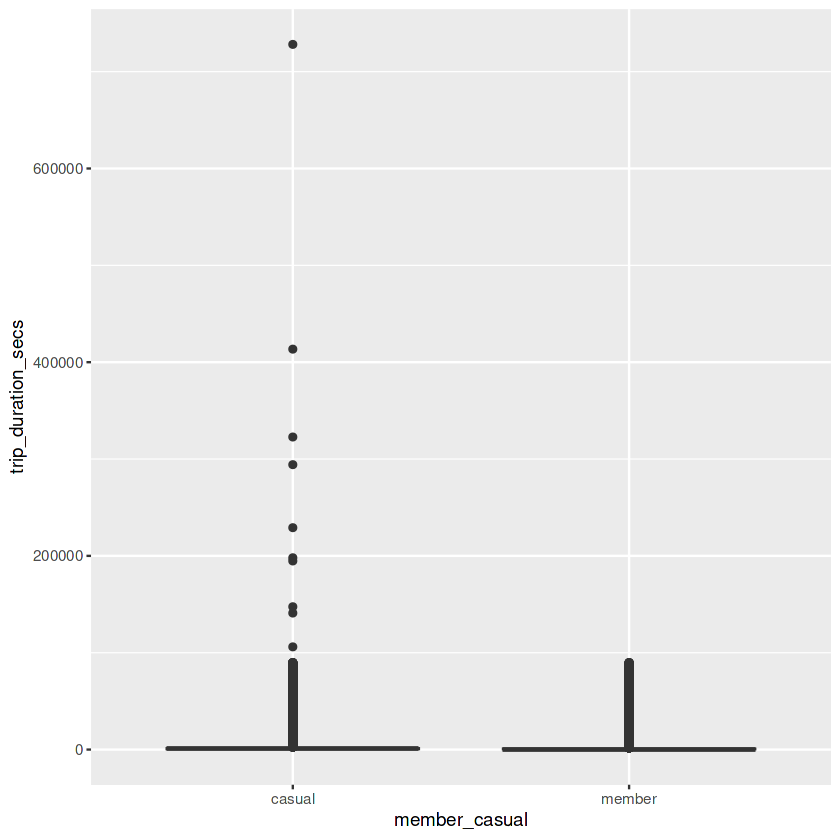

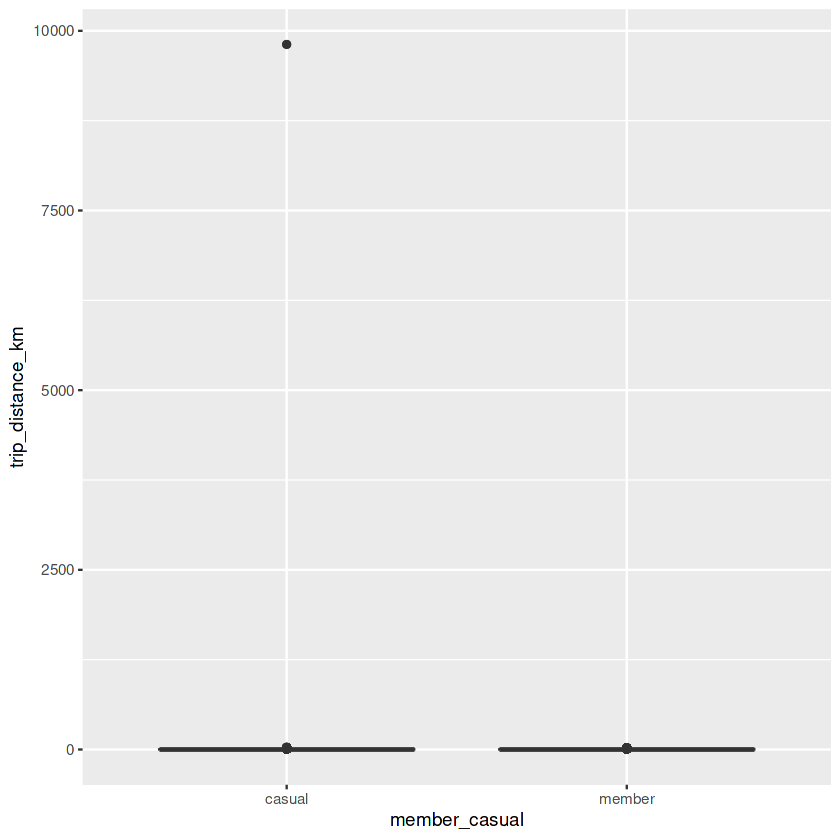

In [18]:
##Load library ggplot
library(ggplot2)
options(scipen=999)

#To detect outlier
ggplot(Cyclistic2) +
  aes(member_casual, trip_duration_secs) +
  geom_boxplot()

ggplot(Cyclistic2) +
  aes(member_casual, trip_distance_km) +
  geom_boxplot()

* From the above box and whisker plot graphs, I can conclude that  trip_duration above 100,000 secs and trip_distance more than 2,500 km are indeed the outliers and needs to be removed.
* Created a new dataframe, Cyclistic3 to filter the trip_duration_sec above 100,000 secs and trip_distance_km above 2,500 km
* Generated another box and whisker plot graph to check the outliers in the new dataframe, **Cyclistic3**

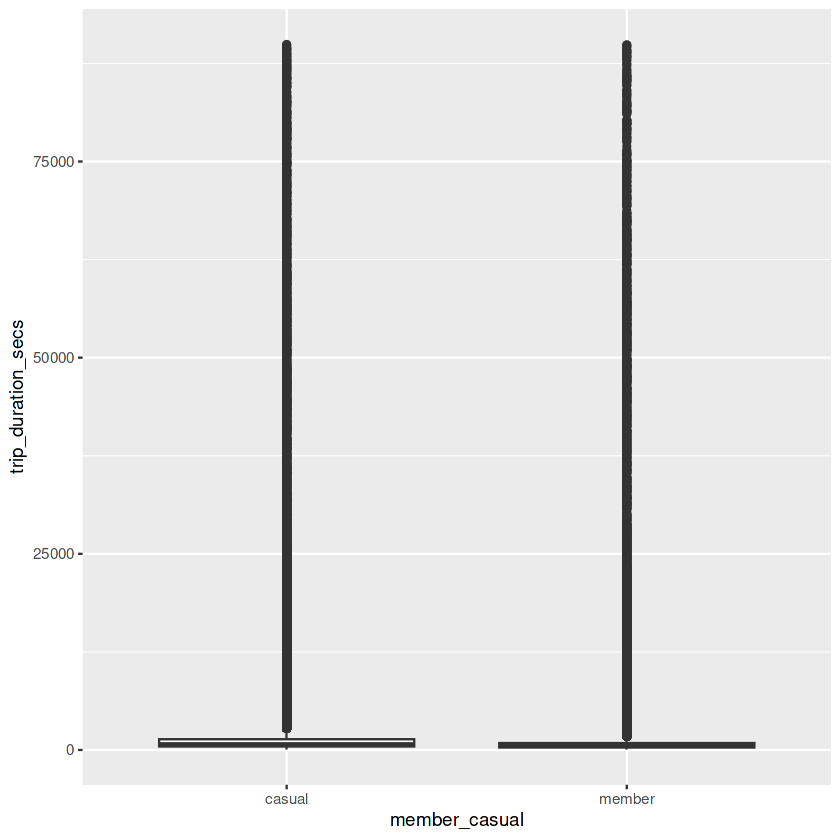

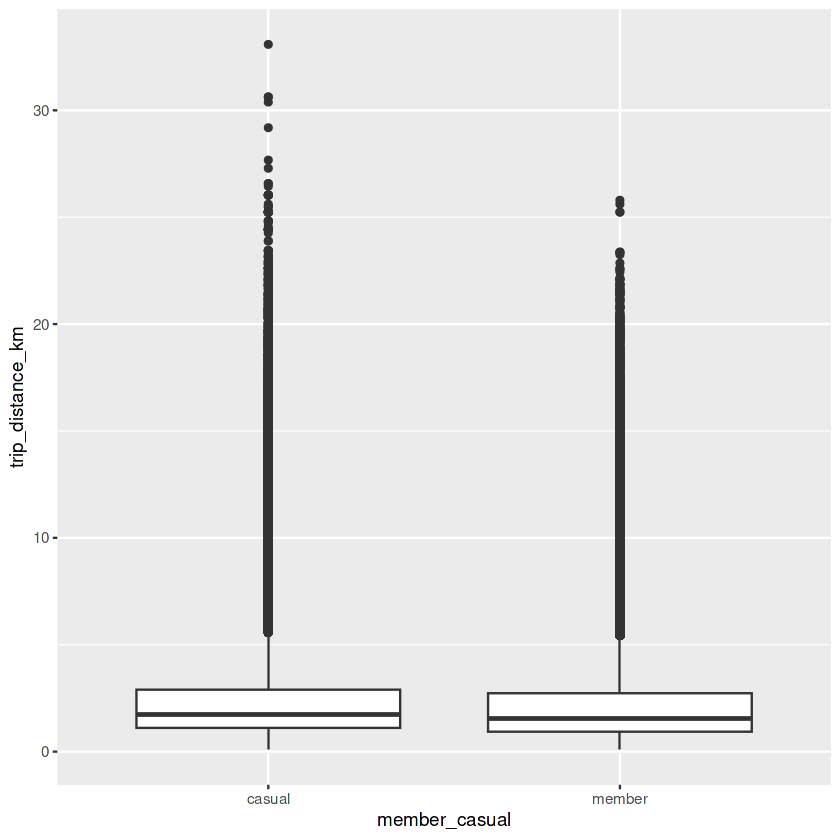

In [19]:
#Create new data frame to remove the outlier
Cyclistic3 <- Cyclistic2 %>%
  filter(trip_duration_secs < 100000) %>%
  filter(trip_distance_km < 2500)

ggplot(Cyclistic3) +
  aes(member_casual, trip_duration_secs) +
  geom_boxplot()

ggplot(Cyclistic3) +
  aes(member_casual, trip_distance_km) +
  geom_boxplot()

In [20]:
summary(Cyclistic3)

#Check the mean, min, max, sd of the data
mean(Cyclistic3$trip_duration_secs)
min(Cyclistic3$trip_duration_secs)
max(Cyclistic3$trip_duration_secs)
sd(Cyclistic3$trip_duration_secs)

mean(Cyclistic3$trip_distance_km)
min(Cyclistic3$trip_distance_km)
max(Cyclistic3$trip_distance_km)
sd(Cyclistic3$trip_distance_km)


   ride_id          rideable_type        started_at                 
 Length:4049211     Length:4049211     Min.   :2023-01-01 00:02:06  
 Class :character   Class :character   1st Qu.:2023-05-20 14:09:00  
 Mode  :character   Mode  :character   Median :2023-07-20 20:02:53  
                                       Mean   :2023-07-16 02:29:40  
                                       3rd Qu.:2023-09-17 13:57:00  
                                       Max.   :2023-12-31 23:58:00  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2023-01-01 00:13:56   Length:4049211     Length:4049211    
 1st Qu.:2023-05-20 14:29:26   Class :character   Class :character  
 Median :2023-07-20 20:18:57   Mode  :character   Mode  :character  
 Mean   :2023-07-16 02:44:57                                        
 3rd Qu.:2023-09-17 14:15:16                                        
 Max.   :2024-01-01 14:20:00      

[1] 916.7493

[1] 61

[1] 89929

[1] 1853.597

[1] 2.20022

[1] 0.1000047

[1] 33.08498

[1] 1.830254

***For easy reference***
* **Mean_tripduration**: 916.74 secs, **Min_tripduration**: 61.00 secs,**Max_tripduration**: 89929 secs
* **Standard Deviation for tripduration**: 1853.59 secs

* **Mean_tripduration**: 2.20 km, **Min_tripduration**: 0.10 km, **Max_tripduration**: 33.08 km
* **Standard Deviation for tripdistance**: 1.83 km

* Since the maximum values in trip_duration and trip_distance still seemed implausible and deviated from the standard deviation, I decided to remove the outliers using Interquartile Range (IQR)

In [21]:
#Function to find outliers using Interquartile Range (IQR) - trip duration
trip_duration_iqr <- 1026-352
trip_duration_lowoutliers <- 352 - 1.5*674
trip_duration_highoutliers <- 1026 + 1.5*674

#Result of the above functions
print(trip_duration_iqr)
print(trip_duration_lowoutliers)
print(trip_duration_highoutliers)

#Function to find outliers using Interquartile Range (IQR) - trip distance
trip_distance_iqr <- 2.8007-0.9944
trip_distance_lowoutliers <- 0.9944 - 1.5*1.8063
trip_distance_highoutliers <- 2.8007 + 1.5*1.8063

#Result of the above functions
print(trip_distance_iqr)
print(trip_distance_lowoutliers)
print(trip_distance_highoutliers)

[1] 674
[1] -659
[1] 2037
[1] 1.8063
[1] -1.71505
[1] 5.51015


* Created a new dataframe, **Cyclistic4**, filtering out the high outliers for trip_duration and trip_distance
* Generated box and whisker plot graph for Cyclistic4 to recheck on the outliers.

   ride_id          rideable_type        started_at                 
 Length:3623233     Length:3623233     Min.   :2023-01-01 00:02:06  
 Class :character   Class :character   1st Qu.:2023-05-18 18:19:05  
 Mode  :character   Mode  :character   Median :2023-07-20 23:23:51  
                                       Mean   :2023-07-15 23:17:22  
                                       3rd Qu.:2023-09-19 07:12:52  
                                       Max.   :2023-12-31 23:58:00  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2023-01-01 00:13:56   Length:3623233     Length:3623233    
 1st Qu.:2023-05-18 18:31:14   Class :character   Class :character  
 Median :2023-07-20 23:33:54   Mode  :character   Mode  :character  
 Mean   :2023-07-15 23:27:58                                        
 3rd Qu.:2023-09-19 07:23:23                                        
 Max.   :2024-01-01 00:24:00      

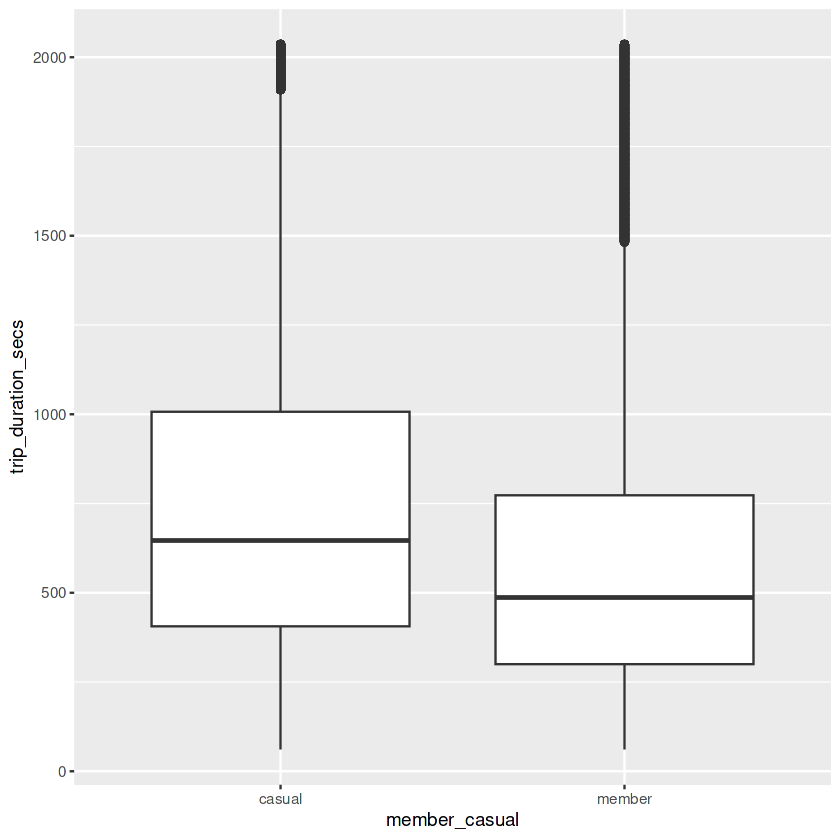

In [22]:
Cyclistic4 <- Cyclistic3 %>%
  filter(trip_duration_secs < 2037) %>%
  filter(trip_distance_km < 5.51015)

summary(Cyclistic4)

ggplot(Cyclistic4) +
  aes(member_casual, trip_duration_secs) +
  geom_boxplot()

**[OPTIONAL]** I decided to break down the cleaned dataframe to separate type of riders to casual riders and members to ease my analysis. 

In [23]:
Cyclistic_casual <- Cyclistic4 %>%
  filter(member_casual == "casual")
Cyclistic_member <- Cyclistic4 %>%
  filter(member_casual == "member")

### Phase 4: ANALYSIS
* There are several questions I prepared for the analysis, which are:
>1. How many riders are casual riders and members?
>2. What are the type of rides commonly used by casual riders and members riders? 
>3. What is the top 5 months with highest number of rides for overall, casual riders, members? 
>4. What factors contribute to the above?
>5. Which day is the highest number of rides for casual riders, members?
>6. What is the average time spent on the rides by casual riders and members
>7. What is the average distance made by casual riders and members?
>8. What is the highest starting station for overall, casual riders and members?



In [24]:
#Question 1: How many riders are casual riders and members?
Cyclistic4 %>%
    group_by(member_casual) %>%
    count(member_casual)

member_casual,n
<chr>,<int>
casual,1160050
member,2463183


rideable_type,n,percentage
<chr>,<int>,<dbl>
classic_bike,2255853,62.26078
docked_bike,38107,1.05174
electric_bike,1329273,36.68748


member_casual,rideable_type,n
<chr>,<chr>,<int>
casual,classic_bike,645896
casual,docked_bike,38107
casual,electric_bike,476047
member,classic_bike,1609957
member,electric_bike,853226


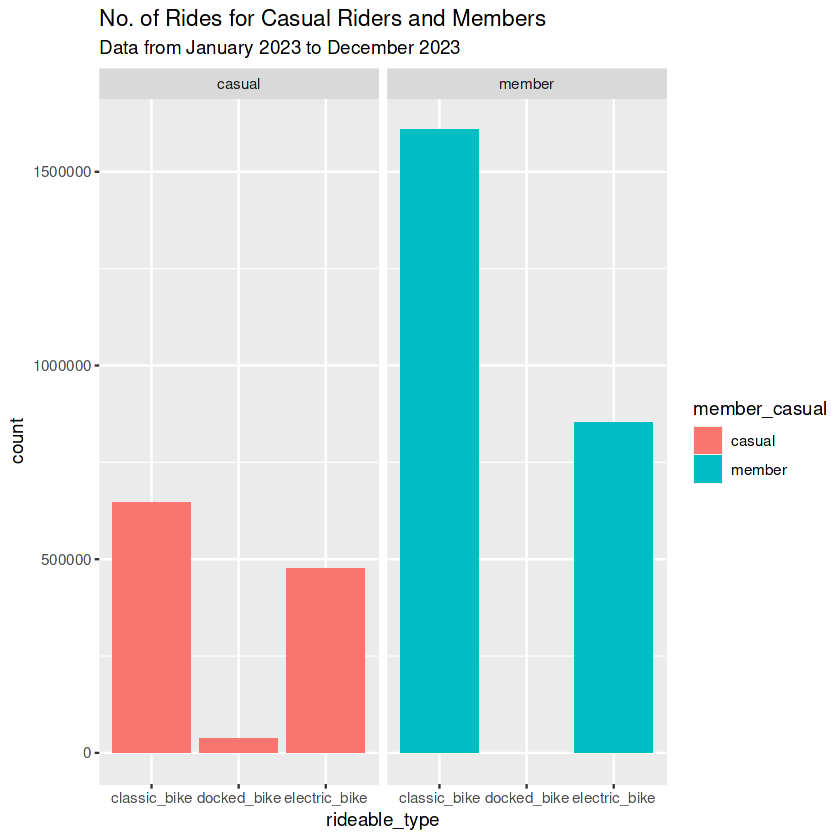

In [25]:
#Question 2: What are the type of rides commonly used by casual riders and members riders?

Cyclistic4 %>%
  count(rideable_type) %>%
  mutate(percentage = n / sum(n) * 100)

Cyclistic4 %>%
    group_by(member_casual, rideable_type) %>% 
    count(rideable_type)

ggplot(data=Cyclistic4) +
  geom_bar(mapping = aes(x=rideable_type, fill=member_casual)) +
  labs (title = "No. of Rides for Casual Riders and Members", subtitle = "Data from January 2023 to December 2023") + 
  facet_wrap(~member_casual)


* Classic bikes were the most preferred type and the bikes were used **62.26%** of the time.  Casual riders used classic bikes 645,896 times and members riders used them 1,609,957 times.
* Following this, electric bikes were used **36.68%** of the time, with casual riders used them 476,047 times and member riders used them 853,226 times.
* Lastly, docked bikes were used by only **1.05%** of the time. No member riders used docked bike, while a small number of casual riders used them 38,107 times in 2023.

month,n
<ord>,<int>
August,480123
July,461663
June,437713
September,419016
May,376632
October,347060
April,268730
November,242946
March,176482


month,n
<ord>,<int>
July,177945
August,175095
June,163790
September,147687
May,128526
October,102507
April,82508
November,59803
March,38929


month,n
<ord>,<int>
August,305028
July,283718
June,273923
September,271329
May,248106
October,244553
April,186222
November,183143
March,137553


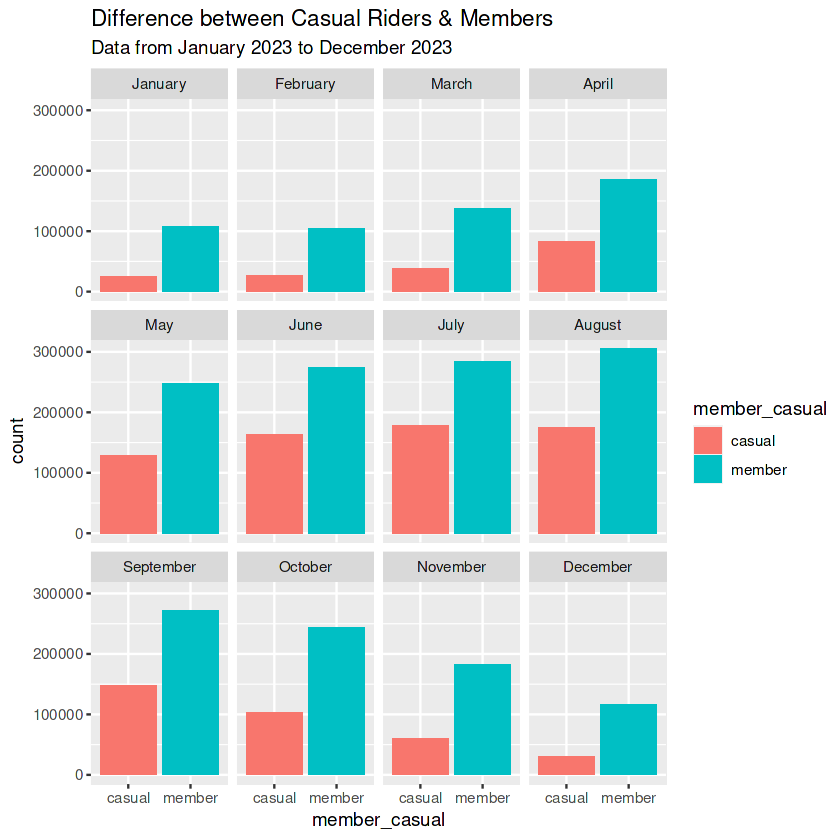

In [26]:
#Question 3: What is the top 5 months with highest number of rides for overall, casual riders, members? 
Cyclistic4 %>%
  count(month) %>%
  arrange(desc(n))

Cyclistic_casual %>%
  count(month) %>%
  arrange(desc(n))

Cyclistic_member %>%
  count(month) %>%
  arrange(desc(n))

ggplot(data=Cyclistic4) + 
  geom_bar(mapping= aes(x=member_casual, fill = member_casual)) +
  labs (title = "Difference between Casual Riders & Members", subtitle = "Data from January 2023 to December 2023") + 
  facet_wrap(~month)

In [27]:
#Seasonal analysis
Cyclistic4 %>%
  count(month) %>% 
  mutate(season = case_when(
    month %in% c("December", "January", "February") ~ "Winter",
    month %in% c("March", "April", "May") ~ "Spring",
    month %in% c("June", "July", "August") ~ "Summer",
    month %in% c("September", "October", "November") ~ "Fall"
  ))

##SPRING SEASON
Cyclistic4 %>%
  filter(month == "March" | month == "April" | month == "May") %>%
  count(month) %>%
  add_row(month = "Total", n = sum(.$n))

##SUMMER SEASON
Cyclistic4 %>%
  filter(month == "June" | month == "July" | month == "August") %>%
  count(month) %>%
  add_row(month = "Total", n = sum(.$n))

##AUTUMN SEASON
Cyclistic4 %>%
  filter(month == "September" | month == "October" | month == "November") %>%
  count(month) %>%
  add_row(month = "Total", n = sum(.$n))

##WINTER SEASON
Cyclistic4 %>%
  filter(month == "January" | month == "February" | month == "December") %>%
  count(month) %>%
  add_row(month = "Total", n = sum(.$n))

month,n,season
<ord>,<int>,<chr>
January,133014,Winter
February,132028,Winter
March,176482,Spring
April,268730,Spring
May,376632,Spring
June,437713,Summer
July,461663,Summer
August,480123,Summer
September,419016,Fall


month,n
<chr>,<int>
March,176482
April,268730
May,376632
Total,821844


month,n
<chr>,<int>
June,437713
July,461663
August,480123
Total,1379499


month,n
<chr>,<int>
September,419016
October,347060
November,242946
Total,1009022


month,n
<chr>,<int>
January,133014
February,132028
December,147826
Total,412868


***Question 4: What factors contribute to the above?***
* Overall, the top 5 months with highest number of riders were **August** (480,123 times), **July** (461,663 times), **June** (437,713 times), **September** (419,016 times) and **May** (376,632 times).
* For casual riders, the top 5 months with highest number of riders were **July** (177,945 times), **August** (175,095 times), **June** (163,790 times), **September** (147,687 times) and **May** (128,526 times).
* For members, the top 5 months with highest number of riders were **August** (305,028 times), **July** (283,718 times), **June** (273,923 times), **September** (271,329 times) and **May** (248,106 times).
* The similarity among the above is that the top 3 months with the highest rides - **June, July and August** occured during the **summer season**. The summer season had the highest number of rides with 1,379,499 times.
* The fall season had the second highest number of rides with 1,099,022 times, followed by the spring season with 821,844 times.
* The lowest number of rides occur during the **winter season** (**December, January and February**) with a total of 412,868 times.


day_of_week,n
<ord>,<int>
Saturday,222908
Sunday,179846
Friday,174909
Thursday,159319
Wednesday,147282
Tuesday,143306
Monday,132480


day_of_week,n
<ord>,<int>
Wednesday,403045
Thursday,401088
Tuesday,398096
Friday,353450
Monday,342893
Saturday,301238
Sunday,263373


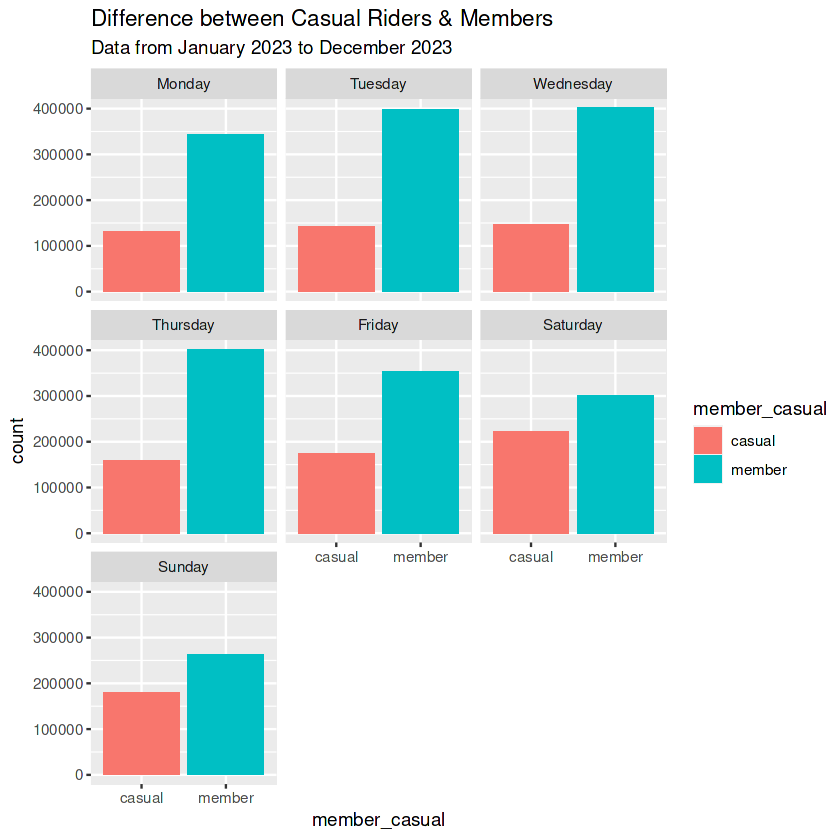

In [28]:
#Question 5: Which day is the highest number of rides for casual riders, members?
Cyclistic_casual %>% 
  count(day_of_week) %>%
  arrange(desc(n))

Cyclistic_member %>% 
  count(day_of_week) %>%
  arrange(desc(n))

ggplot(data=Cyclistic4) + 
  geom_bar(mapping= aes(x=member_casual, fill = member_casual)) +
  labs (title = "Difference between Casual Riders & Members", subtitle = "Data from January 2023 to December 2023") +
  facet_wrap(~day_of_week)
  

* The number of casual riders were the highest on **weekends**, with 222,908 times on Saturdays and 179,846 times on Sundays. These figures take 11% of the total number of rides in 2023. 
* However, the abovementioned number is still lower if I were to compare with members riders as the number of rides made by members where there was 301,283 times on Saturdays and 263,373 times on Sundays, despite being the least popular days for members riders.
* Members riders were the highest on **weekdays** and the top 3 days with highest number of members riders occured on Wednesdays (403,045 times), Thursday (401,088 times) and Tuesdays (398,096 times).

In [29]:
#Question 6: What is the average time spent on the rides by casual riders and members?
# Find average of trip duration for casual riders and members
mean(Cyclistic_casual$trip_duration_secs)
mean(Cyclistic_member$trip_duration_secs)

[1] 749.612

[1] 583.4021

* Casual riders spent an average of 749 seconds (equivalent to approximately ~12 minutes), while members riders spent an average of 583 seconds (equivalent to approximately ~9 minutes).

In [30]:
#Question 7: What is the average distance made by casual riders and members?
mean(Cyclistic_casual$trip_distance_km)
mean(Cyclistic_member$trip_distance_km)

[1] 1.919785

[1] 1.800775

* The average distance travelled by casual riders is slightly greater by 0.1 km (100m) compared to average distance travelled by members riders.

In [31]:
#Question 8: What is the highest starting station for overall, casual riders and members?

# Find top 10 start stations for riders
## start station for overall riders
Cyclistic4 %>%
  count(start_station_name) %>%
  arrange(desc(n)) %>% 
  slice (1:10)

## start station for casual riders
Cyclistic_casual %>% 
  count(start_station_name) %>%
  arrange(desc(n)) %>%
  slice(1:10)

## start station for members riders
Cyclistic_member %>%
  count(start_station_name) %>%
  arrange(desc(n)) %>%
  slice(1:10)

# Find top 10 end stations for riders
## end station for overall riders
Cyclistic4 %>%
  count(end_station_name) %>%
  arrange(desc(n)) %>% 
  slice (1:10)

## end station for casual riders
Cyclistic_casual %>% 
  count(end_station_name) %>%
  arrange(desc(n)) %>%
  slice(1:10)

## end station for members riders
Cyclistic_member %>%
  count(end_station_name) %>%
  arrange(desc(n)) %>%
  slice(1:10)

start_station_name,n
<chr>,<int>
Streeter Dr & Grand Ave,34542
Kingsbury St & Kinzie St,30177
Clark St & Elm St,29508
Clinton St & Washington Blvd,27245
Wells St & Concord Ln,27208
Wells St & Elm St,25321
DuSable Lake Shore Dr & North Blvd,25136
Clinton St & Madison St,22345
Ellis Ave & 60th St,21662


start_station_name,n
<chr>,<int>
Streeter Dr & Grand Ave,22863
DuSable Lake Shore Dr & Monroe St,14013
DuSable Lake Shore Dr & North Blvd,13340
Michigan Ave & Oak St,11041
Shedd Aquarium,10844
Theater on the Lake,9998
Millennium Park,9750
Wells St & Concord Ln,9330
Clark St & Elm St,8439


start_station_name,n
<chr>,<int>
Kingsbury St & Kinzie St,22889
Clinton St & Washington Blvd,22116
Clark St & Elm St,21069
Wells St & Concord Ln,17878
Clinton St & Madison St,17517
Wells St & Elm St,17292
University Ave & 57th St,16697
Loomis St & Lexington St,16262
Ellis Ave & 60th St,15869


end_station_name,n
<chr>,<int>
Streeter Dr & Grand Ave,33806
Kingsbury St & Kinzie St,29734
Clark St & Elm St,29014
Clinton St & Washington Blvd,28784
Wells St & Concord Ln,28237
DuSable Lake Shore Dr & North Blvd,27591
Wells St & Elm St,25894
Clinton St & Madison St,23894
University Ave & 57th St,22231


end_station_name,n
<chr>,<int>
Streeter Dr & Grand Ave,24356
DuSable Lake Shore Dr & North Blvd,15471
Millennium Park,12029
Michigan Ave & Oak St,11835
DuSable Lake Shore Dr & Monroe St,11441
Theater on the Lake,10171
Wells St & Concord Ln,9447
Shedd Aquarium,9218
Clark St & Lincoln Ave,8508


end_station_name,n
<chr>,<int>
Clinton St & Washington Blvd,23843
Kingsbury St & Kinzie St,23066
Clark St & Elm St,21182
Clinton St & Madison St,19119
Wells St & Concord Ln,18790
Wells St & Elm St,17564
University Ave & 57th St,17192
Loomis St & Lexington St,16019
Ellis Ave & 60th St,15583


* Overall, top *start stations* with highest number of rides were **Streeter Dr & Grand Ave** (34,542 times), **Kingsbury St & Kinzie St** (30,177 times) and **Clark St & Elm St** (29,508 times). 
* The same stations were also recorded as *top end stations* for riders where **Streeter Dr & Grand Ave** was chosen 33,806 times, following by **Kingsbury St & Kinzie St** with 29,734 times and **Clark St & Elm St** with 29,014 times.

##### Casual Riders Preferred Stations
* At **Streeter Dr & Grand Ave**, casual riders are the majority riders used Cyclistic as a starting point with 22,863 riders (66.18% of the riders are casual riders). The same station is also the top ending station chosen by riders with 33,806 times in total and casual riders were the highest number of users picked this station point as their end station with 24,356 times (72.04%). 
* Based on Internet research, this station is near to several tourist spots; Centennial Wheel, the Navy Pier, the Chicago Children's Museum and several parks. 
* Other stations with highest casual riders chosen as starting points are **DuSable Lake Shore Dr & Monroe St** with 14,013 times and **DuSable Lake Shore Dr & North Blvd** with 13,340 times which are also well known as tourist spots. 
* While, the second highest for ending destinations are **DuSable Lake Shore Dr & North Blvd** with 15,471 times, follow by **Millennium Park** with 12,029 times.

##### Members Riders Preferred Stations
* Members riders’ top start stations are nearby spots which are mixed of residential and commercial areas as per the Internet research - **Kingsbury St & Kinzie St** (22,889 times), **Clinton St & Washington Blvd** (22,116 times) and **Clark St & Elm St** (21,069 times).
* The highest number of rides for the end stations chosen by members riders were also the same start stations - **Clinton St & Washington Blvd** being the highest number of times chosen by members with 23,843 times, followed by **Kingsbury St & Kinzie St** (23,066 times) and **Clark St & Elm St** (21,182 times).


* The above-mentioned statements show that casual riders prefer to use Cyclistic at tourist spots for leisure purposes and also as the means for transportation, while members riders prefer to use Cyclistic nearby residential/commercial areas as the means for transportation.

#### Summary from the Analysis
1. **Type of Rides:** 
* Casual riders used **3 types of bikes:** *Classic Bikes, Electric Bikes and Docked Bikes* 
* Members riders used only **2 types of bikes:** *Classic Bikes and Electrical Bikes*.
* Classic bikes were the most preferred type for both casual riders (645,896 times) and members riders (1,609,957 times) which makes 62.26% usage of all times in 2023.
* Electric bikes were the second highest with 476,047 times used by casual riders and 853,226 times by members riders, which makes 36.68% usage of all times in 2023.
* Lastly, docked bikes which were used only by casual riders with 38,107 times takes up 1.05% usage of all times in 2023.

2. **Preferred Day:** 
* Generally, members riders used Cyclistic more compared to casual riders throughout the week, whether weekdays or weekends.
* However, the pattern shows that casual riders' used Cyclistic over the weekends with Saturdays being the highest number of rides with 222,908 times and followed by Sundays with 179,846 times. 
* While the pattern for members riders show that the highest number of rides happened on weekdays and the lowest on weekends, where Saturdays (301,238 times) and Sundays (263,373 times) are the lowest users for members. The highest number of rides occurred on Wednesdays (403,045 times), Thursday (401,088 times) and Tuesdays (398,096 times).


3. **Preferred Season:**
* Casual riders had the highest number of riders in **July** with 177,945 users, followed by **August** with 175,095 users and **June** with 163,790 users.
* Members riders had the highest number of riders in **August** with 305,028 users, followed by **July** with 283,718 users and **June** with 273,923 users.
* Overall, **August** had the highest number of riders in 2023 with 480,123 users, followed by **July** with 461,663 users and **June** with 437,713 users.
* The abovementioned shows that the **summer season is the peak season** for riders to use Cyclistic with 1,379,499 rides in total. Followed by the fall season with 1,099,022 rides, the spring season with 821,844 rides and lastly, the winter season with 412,868 rides.
* The summer season had triple times number of rides compared to the winter season, as it was the peak tourist season. This is also supported by an article from [CityPass](https://www.citypass.com/articles/chicago/when-is-the-best-time-to-visit-chicago) and [U.S News](https://travel.usnews.com/Chicago_IL/When_To_Visit/).

4. **Preferred Location:**
* **Streeter Dr & Grand Ave** is the top start station for riders with 34,542 times, follow by **Kingsbury St & Kinzie St** with 30,177 times and **Clark St & Elm St** with 29,508 times. **The same stations are the top end stations for riders** where Streeter Dr & Grand Ave was chosen 33,806 times as the end stations, follow by Kingsbury St & Kinzie St with 29,734 times and Clark St & Elm St with 29,014 times.
* **Majority of the riders who chose Streeter Dr & Grand Ave station were casual riders** - 22,863 times (66.18%) casual riders chose this station as start station & 24,356 times (72.04%) chose as end station. Based on Internet research, this station is near several tourist spots; Centennial Wheel, the Navy Pier, the Chicago Children's Museum and several parks.
* Members riders preferred start stations were near locations which are a mixed of residential and commercial areas - **Kingsbury St & Kinzie St** (22,889 times), **Clinton St & Washington Blvd** (22,116 times) and **Clark St & Elm St** (21,069 times). Same stations were also preferred end stations by members riders - **Clinton St & Washington Blvd** (23,843 times), **Kingsbury St & Kinzie St** (23,066 times) and **Clark St & Elm St** (21,182 times).
* It can be conclude that casual riders prefer to use Cyclistic at tourist spots for leisure purposes and also as the means for transportation, while members riders prefer to use Cyclistic nearby residential/commercial areas as the means for transportation for daily use.

5. **Average time using Cyclistic:**
* The average time spent by casual riders are longer than members riders by approximately 4 minutes, where casual riders average time spent is 749 seconds (quivalent to approximately ~12 minutes) while members riders spent an an average of 583 seconds (equivalent to approximately ~9 minutes).





### Phase 5: SHARE & ACT
#### Recommendation to Stakeholders for Future Marketing Campaigns
In order to attract more casual riders to subscribe for Cyclistic membership, these are  the recommendations to stakeholders’ consideration and action:
1. **Summer Season Pass:** Since summer season *(June, July and August)* has the highest number of riders, it is more likely for casual riders to subscribe for membership during these periods. Hence, more marketing, campaigns and promotions can be done during this period, where riders can subscribe a seasonal membership with better rate. 
2. **Weekend Pass:** We can also promote a weekend pass for casual riders to subscribe as the data shows that weekends (Saturdays and Sundays) are the top 2 days for casual riders using Cyclistic.
3. **Tourist Spots:** We can also do an on-site promotion at the tourist spots in order to increase awareness for Cyclistic membership to the public. For example, location nearby to the Streeter Dr & Grand Ave and DuSable Lake Shore Dr & North Blvd stations as these two stations are prominent start station and end station by casual riders.

#### For Data Visualisation:
* As mentioned on the above, I used Tableau for data visualisation. Please refer [here](https://public.tableau.com/views/Draft1_17108489689070/Story1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link) for the data visualisation.
